In [1]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#Linear regression specific librarires 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

%matplotlib inline

In [3]:
df_train=pd.read_csv("D:/users/prajaram.ALTIMETRIK.000/Downloads/train_V2.csv")


In [4]:
df_test=pd.read_csv("D:/users/prajaram.ALTIMETRIK.000/Downloads/test_V2.csv")

In [5]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
df_train.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [66]:
df_train.drop(['assists', 'boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','killStreaks','longestKill','matchDuration','maxPlace','winPlacePerc'],axis=1,inplace = True)

KeyError: "['assists' 'boosts' 'damageDealt' 'DBNOs' 'headshotKills' 'heals'\n 'killPlace' 'revives' 'rideDistance' 'roadKills' 'swimDistance'\n 'teamKills' 'vehicleDestroys' 'walkDistance' 'weaponsAcquired'\n 'killStreaks' 'longestKill' 'matchDuration' 'maxPlace' 'winPlacePerc'] not found in axis"

In [70]:
df_train

,Id,groupId,matchId,killPoints,kills,matchType,numGroups,rankPoints,winPoints
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,1241,0,squad-fpp,26,-1,1466
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,squad-fpp,25,1484,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,0,0,duo,47,1491,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,squad-fpp,30,1408,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,1,solo-fpp,95,1560,0
...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,1029,0,squad-fpp,28,-1,1507
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,0,solo,93,1501,0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,squad-fpp,28,1500,0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,2,squad-fpp,25,1418,0


In [72]:
df_train.loc[df_train['winPoints'] == df_train['winPoints'].max()].count()

Id            1
groupId       1
matchId       1
killPoints    1
kills         1
matchType     1
numGroups     1
rankPoints    1
winPoints     1
dtype: int64

In [52]:
#df_train['winPlacePerc']=1.0

In [73]:
#df_train.loc[df_train['winPlacePerc'] == 1.0]

In [23]:
df_train.groupby(['matchType'])["winPoints"].max()

matchType
duo                 1823
duo-fpp             1867
flaretpp            1500
normal-duo          1500
normal-duo-fpp      1500
normal-solo         1500
normal-solo-fpp     1500
normal-squad        1500
normal-squad-fpp    1500
solo                1892
solo-fpp            1922
squad               2013
squad-fpp           1999
Name: winPoints, dtype: int64

In [74]:
df_train.index[df_train['matchType'] == 'crashfpp']

Int64Index([], dtype='int64')

In [75]:
#zero_values = df_train[ (df_train['matchType'] == 'crashfpp') & (df_train['matchType']=='crashtpp') & (df_train['matchType']=='flarefpp')].index
  
# drop these given row
#df_train.groupby(['matchType'])["winPoints"].max()

#df_train.drop(zero_values, inplace = True)
#zero_values

In [76]:


df_train.drop(df_train[df_train['matchType']== 'crashfpp'].index, inplace = True)
df_train.drop(df_train[df_train['matchType']=='crashtpp'].index,inplace = True)
df_train.drop(df_train[df_train['matchType']=='flarefpp'].index,inplace = True)
  

In [77]:
df_train


,Id,groupId,matchId,killPoints,kills,matchType,numGroups,rankPoints,winPoints
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,1241,0,squad-fpp,26,-1,1466
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,squad-fpp,25,1484,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,0,0,duo,47,1491,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,squad-fpp,30,1408,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,1,solo-fpp,95,1560,0
...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,1029,0,squad-fpp,28,-1,1507
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,0,solo,93,1501,0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,squad-fpp,28,1500,0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,2,squad-fpp,25,1418,0


In [78]:
df_train.groupby(['matchType'])["winPoints"].max()


matchType
duo                 1823
duo-fpp             1867
flaretpp            1500
normal-duo          1500
normal-duo-fpp      1500
normal-solo         1500
normal-solo-fpp     1500
normal-squad        1500
normal-squad-fpp    1500
solo                1892
solo-fpp            1922
squad               2013
squad-fpp           1999
Name: winPoints, dtype: int64

In [79]:
df_test.head()

,Id,groupId,matchId,killPoints,kills,matchType,numGroups,rankPoints,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,squad-fpp,28,1500,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,2,duo-fpp,47,1503,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,0,0,squad-fpp,27,1565,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,duo-fpp,44,1465,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,3,squad-fpp,27,1480,0


In [80]:
df_test.drop(['assists', 'boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','killStreaks','longestKill','matchDuration','maxPlace'],axis=1,inplace = True)

KeyError: "['assists' 'boosts' 'damageDealt' 'DBNOs' 'headshotKills' 'heals'\n 'killPlace' 'revives' 'rideDistance' 'roadKills' 'swimDistance'\n 'teamKills' 'vehicleDestroys' 'walkDistance' 'weaponsAcquired'\n 'killStreaks' 'longestKill' 'matchDuration' 'maxPlace'] not found in axis"

In [81]:
df_test.groupby(['matchType'])["winPoints"].max()

matchType
duo                 1832
duo-fpp             1841
flaretpp               0
normal-duo          1500
normal-duo-fpp      1500
normal-solo-fpp     1500
normal-squad-fpp    1500
solo                1894
solo-fpp            1919
squad               2000
squad-fpp           1999
Name: winPoints, dtype: int64

In [82]:
df_test.drop(df_test[df_test['matchType']== 'crashfpp'].index, inplace = True)
df_test.drop(df_test[df_test['matchType']=='crashtpp'].index,inplace = True)
df_test.drop(df_test[df_test['matchType']=='flarefpp'].index,inplace = True)
df_test.drop(df_test[df_test['matchType']== 'flaretpp '].index, inplace = True)
df_test.drop(df_test[df_test['matchType']=='normal-solo'].index,inplace = True)
df_test.drop(df_test[df_test['matchType']=='normal-squad'].index,inplace = True)

In [83]:
df_test.dtypes

Id            object
groupId       object
matchId       object
killPoints     int64
kills          int64
matchType     object
numGroups      int64
rankPoints     int64
winPoints      int64
dtype: object

In [84]:
df_test

,Id,groupId,matchId,killPoints,kills,matchType,numGroups,rankPoints,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,squad-fpp,28,1500,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,2,duo-fpp,47,1503,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,0,0,squad-fpp,27,1565,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,duo-fpp,44,1465,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,3,squad-fpp,27,1480,0
...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1294,4,squad-fpp,20,-1,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,1449,0,squad-fpp,26,-1,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,1,squad-fpp,29,1482,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,0,1,duo-fpp,48,1456,0


In [85]:
df_train.groupby(['matchType'])["winPoints"].max()

matchType
duo                 1823
duo-fpp             1867
flaretpp            1500
normal-duo          1500
normal-duo-fpp      1500
normal-solo         1500
normal-solo-fpp     1500
normal-squad        1500
normal-squad-fpp    1500
solo                1892
solo-fpp            1922
squad               2013
squad-fpp           1999
Name: winPoints, dtype: int64

In [86]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
killPoints,4439590.0,505.845067,627.687965,0.0,0.0,0.0,1172.0,2170.0
kills,4439590.0,0.925000,1.558762,0.0,0.0,0.0,1.0,72.0
numGroups,4439590.0,43.009682,23.306200,1.0,27.0,30.0,47.0,100.0
rankPoints,4439590.0,891.000334,736.842149,-1.0,-1.0,1443.0,1500.0,5910.0
winPoints,4439590.0,607.467712,739.901161,0.0,0.0,0.0,1495.0,2013.0


In [87]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
killPoints,1930914.0,510.310317,629.014056,0.0,0.0,0.0,1176.0,2174.0
kills,1930914.0,0.918379,1.523614,0.0,0.0,0.0,1.0,58.0
numGroups,1930914.0,43.408129,23.311295,1.0,27.0,30.0,47.0,100.0
rankPoints,1930914.0,886.334589,738.015766,-1.0,-1.0,1441.0,1500.0,5742.0
winPoints,1930914.0,612.390396,740.861359,0.0,0.0,0.0,1496.0,2000.0


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

MemoryError: Unable to allocate 29.5 MiB for an array with shape (2, 1930914) and data type int64

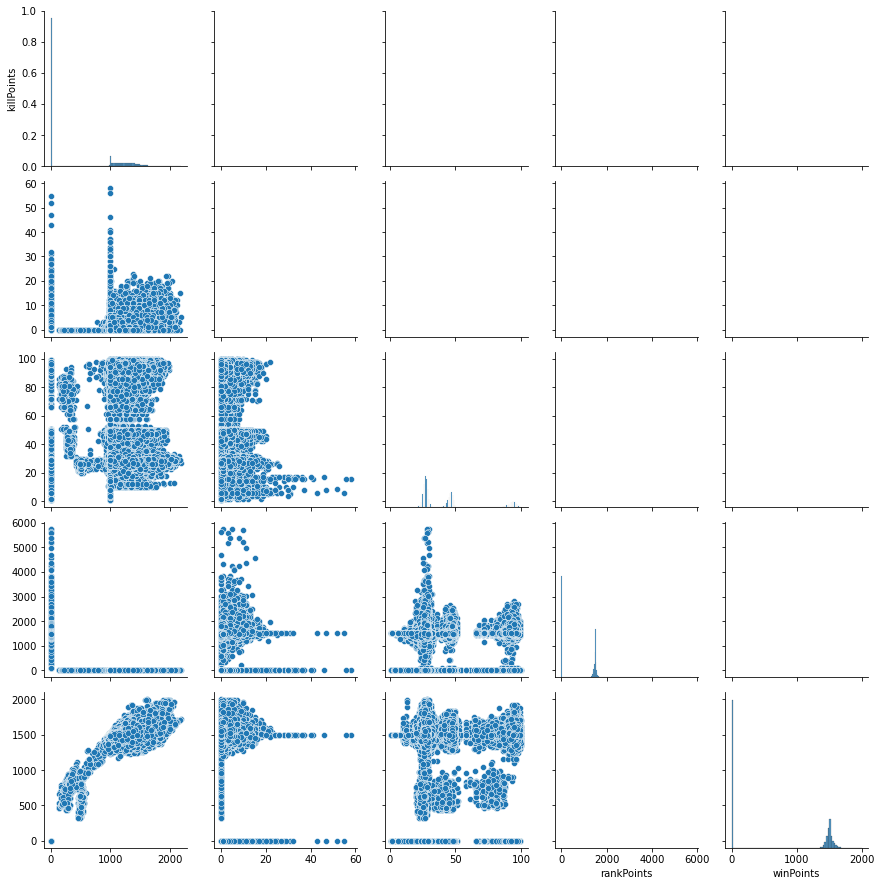

In [95]:
sns.pairplot(df_test)

In [96]:
df_test.corr()

MemoryError: Unable to allocate 73.7 MiB for an array with shape (5, 1930914) and data type float64

In [97]:
model = LinearRegression()

In [98]:
df_test.shape

(1930914, 9)

In [99]:
df_train.shape

(4439590, 9)

In [ ]:
model.fit(df_train,df_train)